In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
# Load the dataset
file_path = 'crypto-markets.csv'
df = pd.read_csv(file_path)

In [34]:
# Data preprocessing and cleaning
# Assuming 'slug' contains the cryptocurrency names
bitcoin_data = df[df['slug'] == 'bitcoin']

In [35]:
# Check for missing values
print('Missing values before cleaning:')
print(bitcoin_data.isnull().sum())

Missing values before cleaning:
slug           0
symbol         0
name           0
date           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64


In [36]:
# Fill or drop missing values as needed
# Example: Fill missing values in 'close' column with the mean value
bitcoin_data['close'].fillna(bitcoin_data['close'].mean(), inplace=True)

In [37]:
# Drop rows with any remaining missing values
bitcoin_data.dropna(inplace=True)


In [38]:
# Check for missing values after cleaning
print('\nMissing values after cleaning:')
print(bitcoin_data.isnull().sum())



Missing values after cleaning:
slug           0
symbol         0
name           0
date           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64


In [39]:
# Select relevant columns for the model
bitcoin_data = bitcoin_data[['date', 'open', 'high', 'low', 'close', 'volume']]


In [40]:
# Convert 'date' column to datetime format
bitcoin_data['date'] = pd.to_datetime(bitcoin_data['date'])

In [41]:
# Set 'date' as the index
bitcoin_data.set_index('date', inplace=True)

In [42]:
# Create a new feature 'day_number' as the number of days since the first data point
bitcoin_data['day_number'] = (bitcoin_data.index - bitcoin_data.index.min()).days

In [43]:
# Prepare the data for linear regression
X = bitcoin_data[['day_number']]
y = bitcoin_data['close']

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


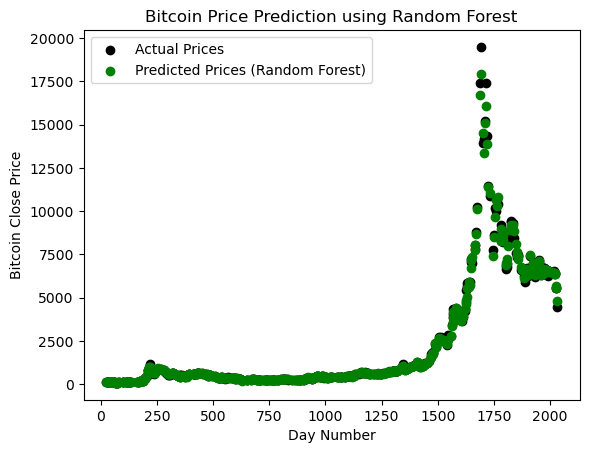

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Visualize the results with Random Forest
plt.scatter(X_test, y_test, color='black', label='Actual Prices')
plt.scatter(X_test, y_pred_rf, color='green', label='Predicted Prices (Random Forest)')
plt.xlabel('Day Number')
plt.ylabel('Bitcoin Close Price')
plt.title('Bitcoin Price Prediction using Random Forest')
plt.legend()
plt.show()



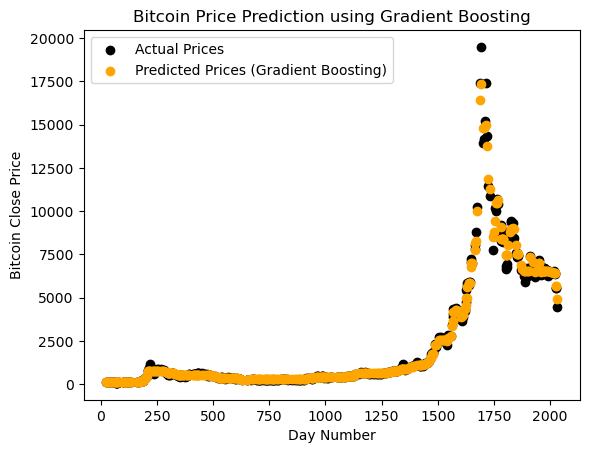

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Visualize the results with Gradient Boosting
plt.scatter(X_test, y_test, color='black', label='Actual Prices')
plt.scatter(X_test, y_pred_gb, color='orange', label='Predicted Prices (Gradient Boosting)')
plt.xlabel('Day Number')
plt.ylabel('Bitcoin Close Price')
plt.title('Bitcoin Price Prediction using Gradient Boosting')
plt.legend()
plt.show()


              Model        MAE           MSE  R-squared
0      RandomForest  59.797128  25783.306557   0.997688
1  GradientBoosting  98.886336  54965.226660   0.995071


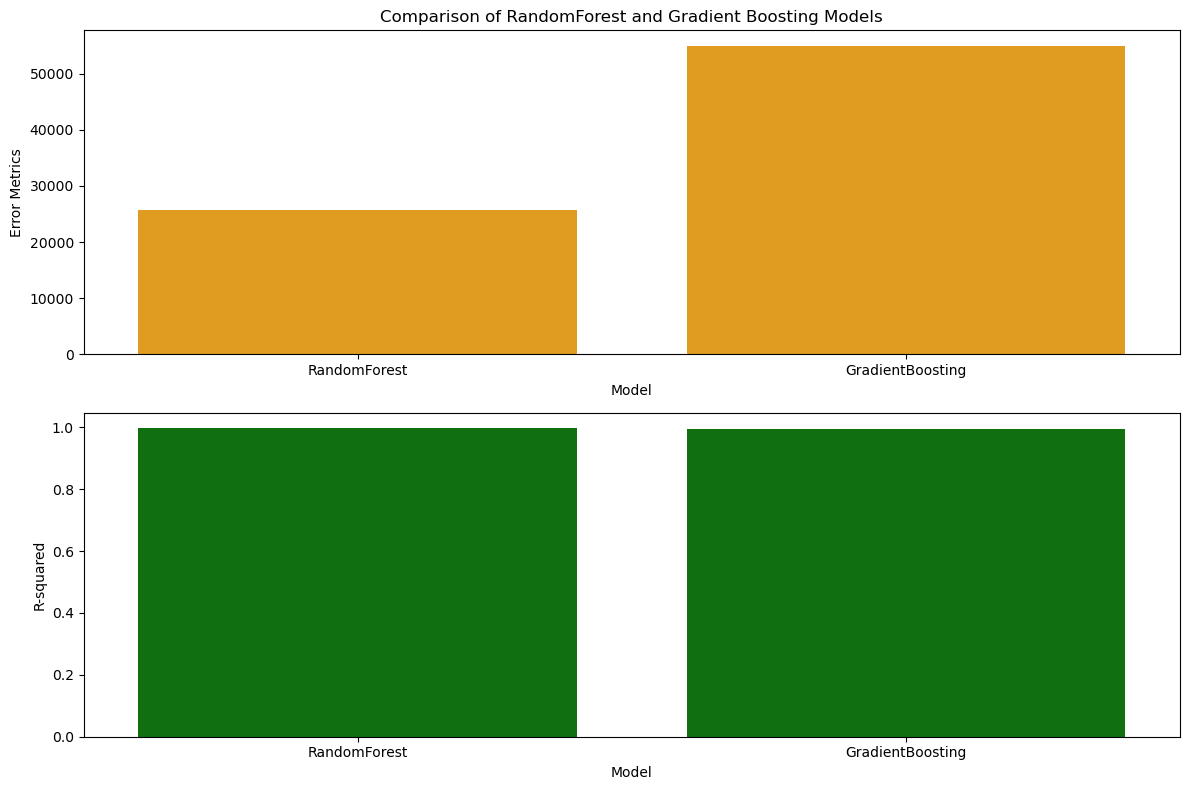

In [51]:
from sklearn.metrics import r2_score

# Evaluate RandomForest model
rf_r2 = r2_score(y_test, y_pred_rf)

# Evaluate Gradient Boosting model
gb_r2 = r2_score(y_test, y_pred_gb)

# Add R-squared to the DataFrame
results_df['R-squared'] = [rf_r2, gb_r2]

# Print the updated results
print(results_df)

# Visualize the results including R-squared
plt.figure(figsize=(12, 8))

# Bar plot for MAE, MSE, and R-squared
plt.subplot(2, 1, 1)
sns.barplot(x='Model', y='MAE', data=results_df, color='blue', label='MAE')
sns.barplot(x='Model', y='MSE', data=results_df, color='orange', label='MSE')
plt.ylabel('Error Metrics')
plt.title('Comparison of RandomForest and Gradient Boosting Models')

# Bar plot for R-squared
plt.subplot(2, 1, 2)
sns.barplot(x='Model', y='R-squared', data=results_df, color='green', label='R-squared')
plt.ylabel('R-squared')
plt.xlabel('Model')

plt.tight_layout()
plt.show()
